In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os, jdc, shutil
from tqdm import tqdm
import seaborn as sns
import scipy.stats as st
import tensorflow as tf
import pandas as pd
import random
from collections import deque
import random

path = '/Users/louisserrano/Documents/Oxford/Courses/Trinity/Dissertation/Code/Toy Experiments/'
os.chdir(path)

from Scripts.rl_glue_horde import RLGlueHorde
from Scripts.toy_env_horde import ToyEnvironment
from Scripts.MC.monteCarloHorde import MonteCarloHorde
from Scripts.utils import bernouilli_cumulant, gaussian_cumulant, wall_detector_cumulant, gvd_based_cumulant, ReplayBuffer
from Scripts.utils import plot_q_values

path = '/Users/louisserrano/Documents/Oxford/Courses/Trinity/Dissertation/Code/Toy Experiments/Notebooks/GVD'
os.chdir(path)

In [26]:
def run_experiment(horde_info, env_info, num_episodes = 1,
                   step_limit = 0,
                   plot_freq = 10,
                   value_error_threshold=1e-8):
    
    env = ToyEnvironment
    horde = MonteCarloHorde
    rl_glue = RLGlueHorde(env, horde)
    rl_glue.rl_init(horde_info, env_info)

    for episode in range(1, num_episodes + 1):
        rl_glue.rl_episode(step_limit) # no step limit
        if episode%plot_freq == 0:
            print(episode)
    
    return rl_glue

In [27]:
#np.save("policy_2", policy_2)

In [28]:
#np.save("policy_4", policy_4)

In [29]:
policy_4 = np.ones(shape = (6*10, 4))*0.25
state_actions = [[23,1], [33,0], [43,0], [53,0], [52,1], [51,1], [50,1]]
for k in range(len(state_actions)):
    s,a = state_actions[k]
    policy_4[s] = 0
    policy_4[s,a] = 1

In [30]:
policy_6 = np.ones(shape = (6*10, 4))*0.25
state_actions = [[23,1], [33,0], [43,0], [53,0], [52,1], [51,1], [50,1]]
for k in range(len(state_actions)):
    s,a = state_actions[k]
    for action in range(4):
        if action == a:
            policy_6[s,action] = 0.85
        else:
            policy_6[s,action] = 0.05

In [31]:
near_wall_states = []
for j in range(10):
    near_wall_states.append([0, j])
    near_wall_states.append([5, j])
for i in range(6):
    near_wall_states.append([i, 0])
    near_wall_states.append([i, 9])

# Create DataFrame

In [33]:
policy = np.ones(shape=(6 * 10, 4)) * 0.25
np.random.seed(15)
policy_2 = np.load('policy_2.npy')
policy_5 = np.load('policy_5.npy')
policy_6 = np.load("policy_6.npy")

GVD_1 = {
    "control": False,
    "policy" : policy,
    "transition_gen" : gaussian_cumulant,
    "transition_gen_params" : {}}

horde_info = {
    "GVDs_info" : [GVD_1],
    "num_quantiles" : 51,
    "policy" : policy,
    "batch_size" : 32,
    "update_freq" : 100,
    "eta" : 5e-4
}

env_info = {
    "end_states" : [[0,8]]}

In [34]:
rl = run_experiment(horde_info, env_info, num_episodes = 1000, plot_freq = 100)

100
200
300
400
500
600
700
800
900
1000


In [35]:
num_quantiles = 51
gvd = rl.horde.GVDs[0]
gvd.set_returns()
gvd.setDataFrame()
tau = (2 * np.arange(num_quantiles) + 1) / (2.0 * num_quantiles)

In [36]:
z = gvd.get_returns(50, 1)
theta = np.quantile(z, tau)

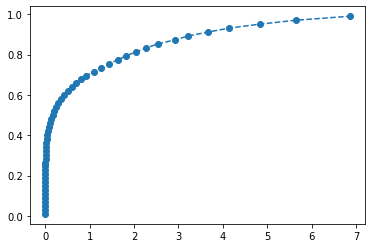

In [37]:
plt.plot(theta, tau, marker = 'o', linestyle = "--")

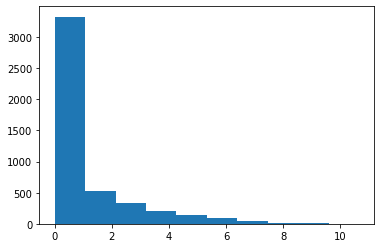

In [38]:
plt.hist(z)
plt.show()

In [39]:
# save data frame
gvd.df.to_csv("results/monte_carlo/gaussian_policy_on_policy_returns", index = False)

# Read DataFrame

In [86]:
df = pd.read_csv("results/monte_carlo/gaussian_policy4_returns_on_policy_ep_1000")

In [87]:
def get_returns(dataframe, last_state, last_action):
    mask = (dataframe["last_state"] == last_state)&(dataframe["last_action"] == last_action)
    return np.array(dataframe.loc[mask, "return"])

In [94]:
z = get_returns(df, 53, 0)

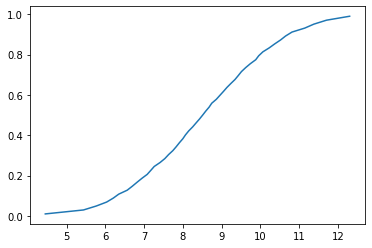

In [95]:
num_quantiles = 51
tau = (2 * np.arange(num_quantiles) + 1) / (2.0 * num_quantiles)
plt.plot(np.quantile(z, tau), tau)

In [82]:
x2 = [1.4873465, 1.5250396, 1.5763447, 1.5916274, 1.5931348, 1.6308713,
       1.6637831, 1.7092173, 1.710069 , 1.726568 , 1.7437801, 1.6993377,
       1.781027 , 1.777509 , 1.7877609, 1.7942946, 1.8092121, 1.822461 ,
       1.7912495, 1.8457975, 1.8227226, 1.8832405, 1.8739197, 1.8851328,
       1.9036818, 1.8993297, 1.9006633, 1.9328592, 1.9234039, 1.9311965,
       1.9378978, 1.9842445, 1.9806722, 2.004182 , 1.9866433, 1.9990867,
       2.032519 , 2.0356731, 2.035716 , 2.0505443, 2.0483515, 2.0848312,
       2.1506474, 2.1314344, 2.1753113, 2.308819 , 2.4008248, 2.5725484,
       2.8355677, 3.6669977, 4.9106226]

In [83]:
x1 = [1.0151321, 1.0953678, 1.1202487, 1.1328897, 1.1583525, 1.1829299,
       1.1997426, 1.2089956, 1.2179028, 1.2369543, 1.2458746, 1.2545751,
       1.2631645, 1.2876716, 1.2925508, 1.3015376, 1.3036195, 1.3238544,
       1.3205838, 1.347596 , 1.3510941, 1.3637813, 1.3546482, 1.3892989,
       1.3884026, 1.3940691, 1.4079249, 1.4354123, 1.448493 , 1.4451756,
       1.4703088, 1.4724872, 1.4954284, 1.5114946, 1.5248369, 1.523098 ,
       1.5501531, 1.5703162, 1.5843611, 1.6231387, 1.6364424, 1.6588783,
       1.699343 , 1.7503529, 1.7753297, 1.8055806, 1.8403741, 1.9299536,
       1.9918199, 2.1393263, 2.5307782]

In [84]:
st.wasserstein_distance(x1, z)

1.3031748283928026

In [85]:
st.wasserstein_distance(x2, z)

1.5480577498413632